In [1]:
#import packages and record dataset
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data_path = '../../data/cleaned_riot_data/league_combined_with_chall_cleaned.csv'
combined_league_ranks = pd.read_csv(data_path, index_col=None)

In [2]:
"""
Same cleaning as before with the record dataset.
"""

#normalize time-dependent features
#do this for variables: kills, deaths, dmgObj, dmgTurr, vision_score, totalDmg, 
#totalDmgTaken, totalMinions, and gold
combined_league_ranks['kills/min'] = combined_league_ranks['kills']/combined_league_ranks['time']
combined_league_ranks['deaths/min'] = combined_league_ranks['deaths']/combined_league_ranks['time']
combined_league_ranks['dmgObj/min'] = combined_league_ranks['dmgObj']/combined_league_ranks['time']
combined_league_ranks['dmgTurr/min'] = combined_league_ranks['dmgTurr']/combined_league_ranks['time']
combined_league_ranks['vision_score/min'] = combined_league_ranks['vision_score']/combined_league_ranks['time']
combined_league_ranks['dmg/min'] = combined_league_ranks['totalDmg']/combined_league_ranks['time']
combined_league_ranks['dmgTaken/min'] = combined_league_ranks['totalDmgTaken']/combined_league_ranks['time']
combined_league_ranks['minions/min'] = combined_league_ranks['totalMinions']/combined_league_ranks['time']
combined_league_ranks['gold/min'] = combined_league_ranks['gold']/combined_league_ranks['time']


#remove the time-dependent columns
combined_league_ranks = combined_league_ranks.drop('kills', axis=1)
combined_league_ranks = combined_league_ranks.drop('deaths', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgObj', axis=1)
combined_league_ranks = combined_league_ranks.drop('dmgTurr', axis=1)
combined_league_ranks = combined_league_ranks.drop('vision_score', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmg', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalDmgTaken', axis=1)
combined_league_ranks = combined_league_ranks.drop('totalMinions', axis=1)
combined_league_ranks = combined_league_ranks.drop('gold', axis=1)

#remove non-numerical columns and time columns
combined_league_ranks = combined_league_ranks.drop('time', axis=1)
combined_league_ranks = combined_league_ranks.drop('position', axis=1)
combined_league_ranks = combined_league_ranks.drop('win', axis=1)

#remove temporarily the class label column "rank" to add to later
rank_col = combined_league_ranks.pop("rank")

In [3]:
"""
Subset the dataset again for features 5 and 8 as found from feature selection.
"""

subset_combined = combined_league_ranks[['vision_score/min', 'minions/min']]

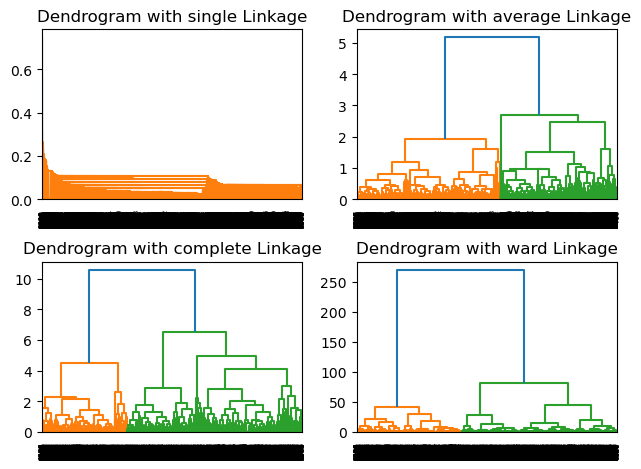

In [10]:
"""
We want to find what the best linkage strategy is for the subset data using
sklearn's dendrogram library.

Since Divisive Hierarchical Clustering isn't really used often, then we will 
focus mainly on Agglomerative Hierarchical Clustering instead.
"""

#list of all linkage strats to compare dendrograms
linkages = ['single','average','complete','ward']
count = 0

for strat in linkages:
    count += 1 #helps make subplot
    plt.subplot(2,2,count) #create 4 subplots

    #create dendrogram to determine which linkage strat to use later
    dendro_dist = linkage(subset_combined,  method=strat)
    dendrogram(dendro_dist)
    plt.title(f'Dendrogram with {strat} Linkage')

plt.tight_layout()

#save .png
plt.savefig('dendro_linkage.png', bbox_inches='tight')

plt.show()


#From dendrogram, it seems the complete linkage strat showed the best balance of
#clustering.

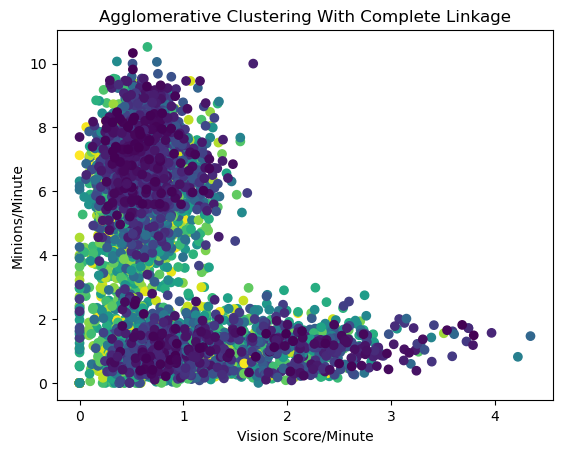

In [11]:
"""
Now we know which linkage strategy works best, fit and predict the subset dataset
to visualize how well the clustering performed with Agglomerative Hierarchical
Clustering.
"""

#use n_clusters=None to not limit the number of clusters
#distance_threshold=0 to not cut the dendrogram when forming clusters
agg_complete = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')

subset_predict = agg_complete.fit_predict(subset_combined)


plt.scatter(subset_combined['vision_score/min'], subset_combined['minions/min'], c=subset_predict)
#labels
plt.title('Agglomerative Clustering With Complete Linkage')
plt.xlabel('Vision Score/Minute')
plt.ylabel('Minions/Minute')

#save .png
plt.savefig('agg_complete_linkage.png', bbox_inches='tight')

plt.show()